In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Smaller Dataset, Feature Selector, Logistic Regression

In [435]:
data_log_reg = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')

# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r_in_d_base,d_in_r_base,r_in_r_base,d_in_d_base,r_hero_id,r_kills,...,r_in_d_base_hero_id,d_in_r_base_hero_id,r_in_d_base_count_ability_use,d_in_r_base_count_ability_use,r_in_d_max_hero_hit,d_in_r_max_hero_hit,r_in_d_damage_dealt,d_in_r_damage_dealt,r_in_r_damage_received,d_in_d_damage_received
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,-355,0,...,0,0,0,0,0,0,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,1,341,16,...,0,0,0,0,0,0,0,0,4857,2154
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,559,6,...,0,0,0,0,0,0,0,0,0,0
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,735,2,...,0,0,0,0,0,0,0,0,0,0


In [436]:
# smaller dataset

col_to_drop = ['r_deaths', 'd_deaths'] 
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
num_feats = [col for col in data_log_reg.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(data_log_reg.columns)):
    if data_log_reg.columns[j] in num_feats:
        numerical_columns.append(j)

In [150]:
# # determine the columns of the numerical data for further normalization
# first_blood_claimed = ['r{}_firstblood_claimed'.format(x) for x in range(1,6)]+['d{}_firstblood_claimed'.format(x) for x in range(1,6)]+['r_firstblood_claimed','d_firstblood_claimed']
# cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base', 'r_in_r_base', 'd_in_d_base']+first_blood_claimed
# num_feats = [col for col in data.columns if col not in cat_feats]
# # numerical

In [439]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))



In [440]:
from sklearn.model_selection import train_test_split

# X = data_log_reg
X = preprocess.fit_transform(data_log_reg)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [441]:
X_train.shape

(27772, 150)

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 10,penalty = 'l2',random_state = 50 )




In [445]:
from sklearn.feature_selection import RFECV


feat_selector = RFECV(logreg, step = 3, cv = 5, min_features_to_select = 20)
feat_selector = feat_selector.fit(X_train, y_train)

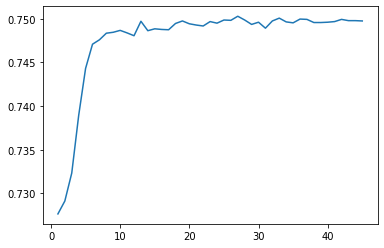

In [446]:
plt.plot(range(1, len(feat_selector.grid_scores_) + 1), feat_selector.grid_scores_)

In [448]:
# # select only the matrix of meaningfull features
# X_train_new = feat_selector.transform(X_trans)
# X_test_new = feat_selector.transform(preprocess.transform(X_test))


0.7545156683189111
0.7530601662833893


Text(0.5, 0, 'coefficients of regression')

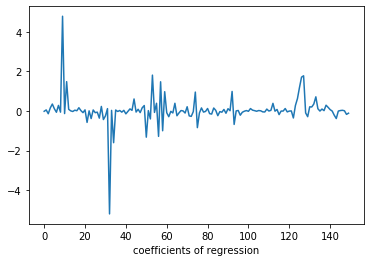

In [450]:
# fit logreg with penalty 'l1' on the feature selected above( penalty 'l2' used for spped. Can be repeated with 'l1')
logreg = LogisticRegression(C = 10,penalty = 'l1',random_state = 50 )


logreg.fit(X_train,y_train)
predicted = logreg.predict(X_test)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [452]:
# fit this model on only selected fetures:

logreg.fit(X,y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [453]:
test_data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test_small.csv', index_col ='match_id_hash')
# #small
# test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test_small.csv', index_col ='match_id_hash')
test_data.shape

(10000, 96)

In [454]:
# X_sub = test_data
X_sub_log_reg = feat_selector.transform(preprocess.transform(X_sub))
y_test_pred_log_red = logreg.predict_proba(X_sub_log_reg)[:, 1]
y_test_pred_log_red

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [370]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)

print('Submission saved to {}'.format(submission_filename))
df_submission.head(10)

Submission saved to submission_2019-11-15_18-32-42.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.285957
70e5ba30f367cea48793b9003fab9d38,0.963710
4d9ef74d3a2025d79e9423105fd73d41,0.868812
2bb79e0c1eaac1608e5a09c8e0c6a555,0.821172
bec17f099b01d67edc82dfb5ce735a43,0.248324
038acbb47d9eb54c11962d07cce8d829,0.129400
b891f03bb2a86d78b84043437fc95e04,0.957244
ff898afdb5bb5c7163bde45a009503f7,0.078063
72e6b1c31c718c0806f9aaeb8b7290a9,0.699101


# Smaller Dataset, Logistic Regression, no Feature Selector

In [548]:
data_log_reg = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')

# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r1_in_d_base,d1_in_r_base,r1_in_r_base,d1_in_d_base,r2_in_d_base,d2_in_r_base,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,0,0,0,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,0,0,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,0,0,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


In [549]:
# smaller dataset

col_to_drop = ['r_deaths', 'd_deaths'] 
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
# boolean_cols = ['boolean_r_ability_level','boolean_d_ability_level','boolean_r_kills','boolean_d_kills',
#                 'boolean_r_assists','boolean_d_assists','boolean_r_deaths','boolean_d_deaths','boolean_r_sen_placed',
#                'boolean_d_sen_placed']
# cat_feats += boolean_cols

num_feats = [col for col in data_log_reg.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(data_log_reg.columns)):
    if data_log_reg.columns[j] in num_feats:
        numerical_columns.append(j)

In [550]:
from sklearn.model_selection import train_test_split

X_log_reg = data_log_reg

X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y, test_size=0.30, random_state=150)
X_train.shape

(27772, 116)

In [551]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 10,penalty = 'l1',random_state = 150 )

pipe = make_pipeline(preprocess, logreg)

In [552]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_bas... penalty='l1', random_state=150, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [553]:
predicted_log_reg = pipe.predict(X_test)
print(accuracy_score(y_test, predicted_log_reg))
print(roc_auc_score(y_test,predicted_log_reg))

0.7545996807527514
0.7531655121174597


In [555]:
pipe.fit(X_log_reg,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r1_in_d_bas... penalty='l1', random_state=150, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Text(0.5, 0, 'coefficients of regression')

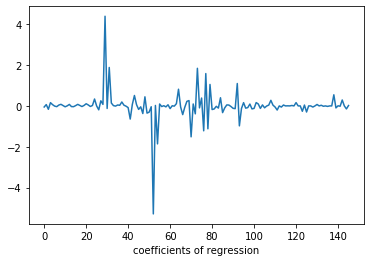

In [556]:
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [557]:
test_data =  pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test_small.csv', index_col ='match_id_hash')
test_data.shape

(10000, 116)

In [558]:
X_sub_log_reg = test_data
y_test_pred_log_reg = pipe.predict_proba(X_sub_log_reg)[:, 1]
y_test_pred_log_reg

array([0.38360925, 0.98405493, 0.93870545, ..., 0.40728977, 0.87807082,
       0.12910378])

In [559]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred_log_reg},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-15_22-22-31.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.383609
70e5ba30f367cea48793b9003fab9d38,0.984055
4d9ef74d3a2025d79e9423105fd73d41,0.938705
2bb79e0c1eaac1608e5a09c8e0c6a555,0.802060
bec17f099b01d67edc82dfb5ce735a43,0.206650
038acbb47d9eb54c11962d07cce8d829,0.076086
b891f03bb2a86d78b84043437fc95e04,0.952668
ff898afdb5bb5c7163bde45a009503f7,0.078463
72e6b1c31c718c0806f9aaeb8b7290a9,0.569190


In [36]:
df_submission.shape

(10000, 1)

# Full data set

In [390]:
data_log_reg = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')

# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))

data_log_reg.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r_in_d_base,d_in_r_base,r_in_r_base,d_in_d_base,r_hero_id,r_kills,...,log_r_purchase_count,log_d_purchase_count,log_r_count_ability_use,log_d_count_ability_use,log_r_damage_dealt,log_d_damage_dealt,log_r_damage_received,log_d_damage_received,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,-355,0,...,3.526361,3.583519,2.079442,2.484907,9.075322,9.153347,8.353026,7.349874,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,1,341,16,...,4.653960,4.488636,4.553877,4.634729,11.152902,10.754044,9.961945,10.104794,2.397895,6.490724
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,2,3,0,...,3.091042,2.944439,0.693147,0.693147,4.262680,4.234107,4.234107,4.262680,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,559,6,...,4.276666,4.304065,4.753590,4.418841,10.827389,11.142325,9.632138,10.034910,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,735,2,...,3.784190,3.713572,4.477337,4.262680,10.543076,10.900879,9.672060,9.148997,1.386294,6.118097


In [391]:
# determine the columns of the numerical data for further normalization

first_blood_claimed = ['r{}_firstblood_claimed'.format(x) for x in range(1,6)]+['d{}_firstblood_claimed'.format(x) for x in range(1,6)]+['r_firstblood_claimed','d_firstblood_claimed']
base = ['r{}_in_d_base'.format(x) for x in range(1,6)]+['d{}_in_d_base'.format(x) for x in range(1,6)]+['r_in_d_base','d_in_d_base']
base += ['r{}_in_r_base'.format(x) for x in range(1,6)]+['d{}_in_r_base'.format(x) for x in range(1,6)]+['r_in_r_base','d_in_r_base']
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base']+base+first_blood_claimed
num_feats = [col for col in data_log_reg.columns if col not in cat_feats]
# numerical

In [392]:
numerical_columns =[]
for j in range(len(data_log_reg.columns)):
    if data_log_reg.columns[j] in num_feats:
        numerical_columns.append(j)

In [421]:
from sklearn.model_selection import train_test_split
X = data_log_reg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [410]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 1,penalty = 'l2',random_state = 150 )

pipe = make_pipeline(preprocess, logreg)

In [427]:


X_trans = preprocess.fit_transform(X_train)


In [ ]:
from sklearn.feature_selection import RFECV
feat_selector = RFECV(logreg, step = 20, cv = 5, min_features_to_select = 50)
feat_selector = feat_selector.fit(X_trans, y_train)

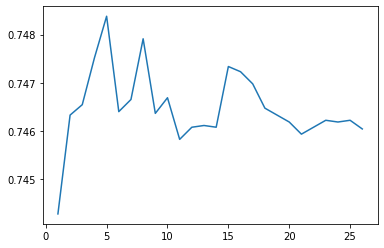

In [406]:
# select only the matrix of meaningfull features
X_train_new = feat_selector.transform(X_trans)
X_test_new = feat_selector.transform(preprocess.transform(X_test))
plt.plot(range(1, len(feat_selector.grid_scores_) + 1), feat_selector.grid_scores_)

0.7529194320759472
0.7514894746152486


Text(0.5, 0, 'coefficients of regression')

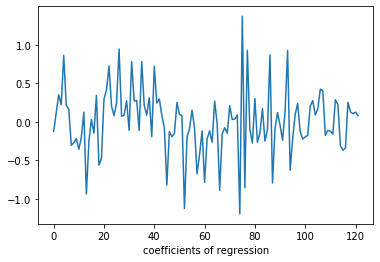

In [411]:
logreg.fit(X_train_new,y_train)
predicted = logreg.predict(X_test_new)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [429]:
X_trans =  feat_selector.transform(preprocess.transform(X))
logreg.fit(X_trans,y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=150, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [403]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r_hero_id',... penalty='l1', random_state=150, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [404]:
predicted_log_reg = pipe.predict(X_test)
print(accuracy_score(y_test, predicted_log_reg))
print(roc_auc_score(y_test,predicted_log_reg))

0.7515752331345039
0.750234820449319


In [145]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['r_hero_id', 'r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_..., penalty='l1', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Text(0.5, 0, 'coefficients of regression')

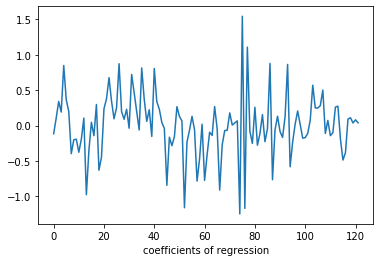

In [430]:
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [432]:
test_data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')
print(test_data.shape)


(10000, 471)


In [148]:
X_sub = test_data
y_test_pred = pipe.predict_proba(X_sub)[:, 1]
y_test_pred

array([0.34202548, 0.97225934, 0.96722677, ..., 0.34132535, 0.87918068,
       0.10081824])

In [433]:
X_sub = feat_selector.transform(preprocess.transform(test_data))
y_test_pred = logreg.predict_proba(X_sub)[:, 1]
y_test_pred

array([0.36671222, 0.9828056 , 0.93526609, ..., 0.31991433, 0.82086005,
       0.13639757])

In [434]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-15_21-00-18.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.366712
70e5ba30f367cea48793b9003fab9d38,0.982806
4d9ef74d3a2025d79e9423105fd73d41,0.935266
2bb79e0c1eaac1608e5a09c8e0c6a555,0.814289
bec17f099b01d67edc82dfb5ce735a43,0.194403
038acbb47d9eb54c11962d07cce8d829,0.083764
b891f03bb2a86d78b84043437fc95e04,0.948981
ff898afdb5bb5c7163bde45a009503f7,0.092533
72e6b1c31c718c0806f9aaeb8b7290a9,0.602461


# Random Forest

In [560]:
data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
data.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,d5_ability_level,d5_max_hero_hit,d5_purchase_count,d5_count_ability_use,d5_damage_dealt,d5_damage_received
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,-549,0,0,0,0,...,0,0,0,0,0,164,6,4,2332,681
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,-71,7,2,0,7,...,0,0,0,0,4,164,11,7,2308,2154
6db558535151ea18ca70a6892197db41,21,23,0,0,0,147,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,188,1,0,3,1,...,0,0,2,0,3,135,13,19,3955,3317
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,627,0,1,1,0,...,0,0,0,0,2,67,7,9,10739,2785


In [561]:
test_data_rf = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')

In [183]:

x_c = ['r{}_x'.format(x) for x in range(1,6)] +['d{}_x'.format(x) for x in range(1,6)]
y_c = ['r{}_y'.format(x) for x in range(1,6)] +['d{}_y'.format(x) for x in range(1,6)]
hero_id = ['r{}_hero_id'.format(x) for x in range(1,6)] +['d{}_hero_id'.format(x) for x in range(1,6)]
health = ['r{}_health'.format(x) for x in range(1,6)] +['d{}_health'.format(x) for x in range(1,6)]
max_health = ['r{}_health'.format(x) for x in range(1,6)] +['d{}_health'.format(x) for x in range(1,6)]
xp = ['r{}_xp'.format(x) for x in range(1,6)] +['d{}_xp'.format(x) for x in range(1,6)]
gold = ['r{}_gold'.format(x) for x in range(1,6)] +['d{}_gold'.format(x) for x in range(1,6)]
damage_dealt = ['r{}_damage_dealt'.format(x) for x in range(1,6)] +['d{}_damage_dealt'.format(x) for x in range(1,6)]
damage_received = ['r{}_damage_received'.format(x) for x in range(1,6)] +['d{}_damage_received'.format(x) for x in range(1,6)]
max_hero_hit = ['r{}_max_hero_hit'.format(x) for x in range(1,6)] +['d{}_max_hero_hit'.format(x) for x in range(1,6)]
# ability_level = ['r{}_ability_level'.format(x) for x in range(1,6)] +['d{}_ability_level'.format(x) for x in range(1,6)]

train_positions = data[x_c+y_c+hero_id+health+max_health+xp+gold+damage_dealt+damage_received+max_hero_hit+['game_mode']]
train_positions.head(2)

,r1_x,r2_x,r3_x,r4_x,r5_x,d1_x,d2_x,d3_x,d4_x,d5_x,...,r2_max_hero_hit,r3_max_hero_hit,r4_max_hero_hit,r5_max_hero_hit,d1_max_hero_hit,d2_max_hero_hit,d3_max_hero_hit,d4_max_hero_hit,d5_max_hero_hit,game_mode
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,116,124,70,170,120,82,174,180,90,128,...,0,4,42,0,76,50,68,62,164,22
b9c57c450ce74a2af79c9ce96fac144d,76,78,156,154,150,88,156,124,124,180,...,247,153,201,152,114,182,226,78,164,4


In [562]:
from sklearn.model_selection import train_test_split

# X_rf = train_positions.values
X_rf = data.values
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.30, random_state=150)


In [568]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(max_features = 'sqrt', max_depth = 30, n_estimators = 2000, min_samples_leaf=2, random_state=50)
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [569]:
print('accuracy_score: {}'.format(cls.score(X_test,y_test)))
from sklearn.metrics import accuracy_score, roc_auc_score
predicted_rf = cls.predict_proba(X_test)[:,1]
print('roc_auc_score: {}'.format(roc_auc_score(y_test,predicted_rf)))


accuracy_score: 0.7220028564227505
roc_auc_score: 0.8010677657880771


In [575]:
# combination of logreg and RF
alphas = [ 0,  0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,1]
for alpha in alphas:
    predicted = (alpha*predicted_rf + (1-alpha)*predicted_log_reg)*0.5
    print(alpha,roc_auc_score(y_test,predicted))

0 0.7531655121174597
0.2 0.8226753086856536
0.3 0.8226753369892092
0.4 0.8226753228374314
0.5 0.8226753228374315
0.6 0.8226752520785423
0.7 0.8226538545904829
0.8 0.822097109499381
1 0.8010677657880771


In [576]:
# fit on full data and predict for submission
cls.fit(X_rf,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [578]:
# X_sub_rf = test_data_rf[x_c+y_c+hero_id+health+max_health+xp+gold+damage_dealt+damage_received+max_hero_hit+['game_mode']]
X_sub_rf = test_data_rf
y_test_pred_rf = cls.predict_proba(X_sub_rf)[:, 1]
y_test_pred_rf

array([0.50164207, 0.87354039, 0.7160869 , ..., 0.47145021, 0.83008882,
       0.27250143])

In [579]:
y_test_pred = 0.5*(y_test_pred_rf+y_test_pred_log_reg)

In [580]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-15_23-23-28.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.442626
70e5ba30f367cea48793b9003fab9d38,0.928798
4d9ef74d3a2025d79e9423105fd73d41,0.827396
2bb79e0c1eaac1608e5a09c8e0c6a555,0.699071
bec17f099b01d67edc82dfb5ce735a43,0.322366
038acbb47d9eb54c11962d07cce8d829,0.157229
b891f03bb2a86d78b84043437fc95e04,0.909203
ff898afdb5bb5c7163bde45a009503f7,0.111151
72e6b1c31c718c0806f9aaeb8b7290a9,0.558920


# SVM 

Gives the worst predictions out of all alther models.

In [332]:
data_svm = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')

# #small set
#data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train_small.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data_svm.head()

,d_dead,r_dead,d_health_avg,r_health_avg,r_in_d_base,d_in_r_base,r_in_r_base,d_in_d_base,r_hero_id,r_kills,...,r_in_d_base_hero_id,d_in_r_base_hero_id,r_in_d_base_count_ability_use,d_in_r_base_count_ability_use,r_in_d_max_hero_hit,d_in_r_max_hero_hit,r_in_d_damage_dealt,d_in_r_damage_dealt,r_in_r_damage_received,d_in_d_damage_received
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,0,0.954967,0.715500,0,0,0,0,-355,0,...,0,0,0,0,0,0,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,0,0,0.764778,0.846735,0,0,1,1,341,16,...,0,0,0,0,0,0,0,0,4857,2154
6db558535151ea18ca70a6892197db41,0,0,0.989032,0.989333,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,0,0,0.869557,0.955818,0,0,0,0,559,6,...,0,0,0,0,0,0,0,0,0,0
b1b35ff97723d9b7ade1c9c3cf48f770,0,0,0.808481,0.735127,0,0,0,0,735,2,...,0,0,0,0,0,0,0,0,0,0


In [333]:
# smaller dataset

col_to_drop = ['r_deaths', 'd_deaths'] 
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
num_feats = [col for col in data_svm.columns if col not in cat_feats]
numerical_columns =[]
for j in range(len(data_svm.columns)):
    if data_svm.columns[j] in num_feats:
        numerical_columns.append(j)

In [334]:
from sklearn.model_selection import train_test_split

X_svm = data_svm

X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y, test_size=0.30, random_state=150)
X_train.shape

(27772, 120)

In [335]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))

from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter = 4000)

pipe_svm = make_pipeline(preprocess, svm)

In [336]:
pipe_svm.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r_hero_id',...ax_iter=4000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [337]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred_svm = pipe_svm.predict(X_test)
print('accuracy_score: {}'.format(pipe_svm.score(X_test,y_test)))
# predicted_svm = pipe_svm.predict_proba(X_test)[:,1]
print('roc_auc_score: {}'.format(roc_auc_score(y_test,predicted_svm)))


accuracy_score: 0.7545996807527514
roc_auc_score: 0.5473836334689545


In [339]:
pipe_svm.fit(X_svm, y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['d_dead', 'r_dead', 'd_health_avg', 'r_health_avg', 'r_hero_id',...ax_iter=4000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [338]:
predicted = (predicted_rf + predicted_log_reg+y_pred_svm)/3
print(roc_auc_score(y_test,predicted))

0.8205922235980896


In [344]:
test_data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test_small.csv', index_col ='match_id_hash')
print(test_data.shape)
X_sub = test_data
y_test_pred_svm = pipe_svm.predict(X_sub)
y_test_pred_svm

(10000, 120)


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [345]:
y_test_pred = (y_test_pred_rf+y_test_pred_log_reg+y_test_pred_svm)/3

In [346]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-15_18-14-32.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.285957
70e5ba30f367cea48793b9003fab9d38,0.963710
4d9ef74d3a2025d79e9423105fd73d41,0.868812
2bb79e0c1eaac1608e5a09c8e0c6a555,0.821172
bec17f099b01d67edc82dfb5ce735a43,0.248324
038acbb47d9eb54c11962d07cce8d829,0.129400
b891f03bb2a86d78b84043437fc95e04,0.957244
ff898afdb5bb5c7163bde45a009503f7,0.078063
72e6b1c31c718c0806f9aaeb8b7290a9,0.699101
